### Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import Dataset

In [2]:
df = pd.read_csv("/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv")

### Exploratory Data Analysis

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
cols = df.columns 
cols

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
df["stroke"].value_counts(normalize = True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [9]:
df["smoking_status"].value_counts(normalize = True)

smoking_status
never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: proportion, dtype: float64

In [10]:
df["gender"].value_counts(normalize = True)

gender
Female    0.585910
Male      0.413894
Other     0.000196
Name: proportion, dtype: float64

In [11]:
df["work_type"].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [12]:
df["Residence_type"].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [13]:
df.rename(columns = {
    "Residence_type" : "residence_type"
} , inplace = True)

### Visualization

In [14]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


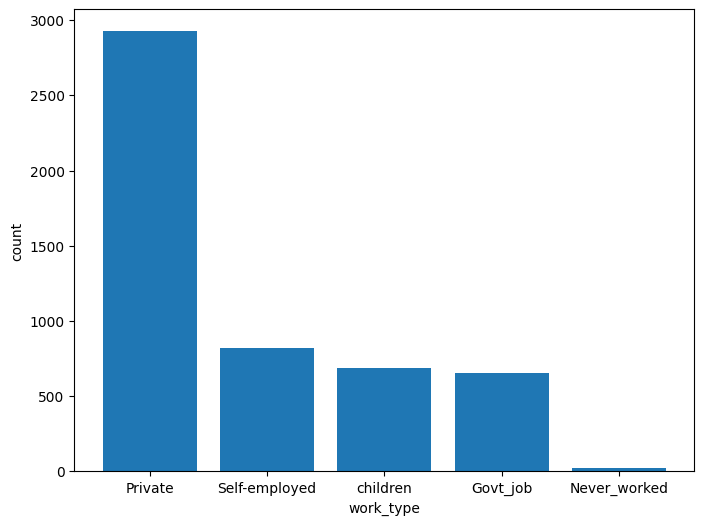

In [15]:
work_type_counts = df["work_type"].value_counts()

plt.figure(figsize = (8,6))
plt.bar(work_type_counts.index , work_type_counts.values)
plt.xlabel("work_type")
plt.ylabel("count")
plt.show()

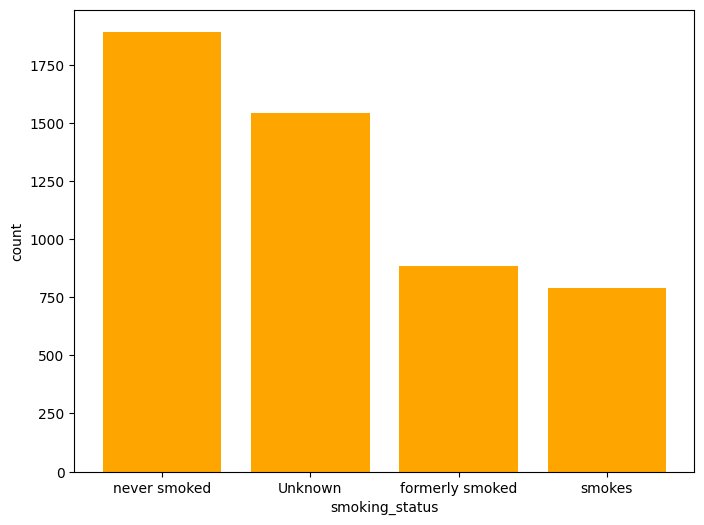

In [16]:
smoking_status_counts = df["smoking_status"].value_counts()

plt.figure(figsize=(8,6))
plt.bar(smoking_status_counts.index , smoking_status_counts.values , color = "orange" )
plt.xlabel("smoking_status")
plt.ylabel("count")
plt.show()

<Figure size 800x600 with 0 Axes>

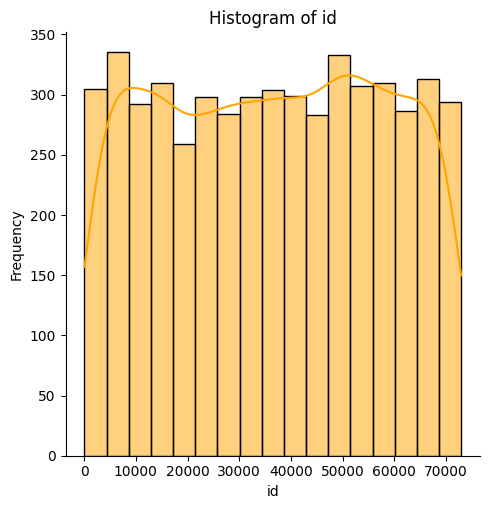

<Figure size 800x600 with 0 Axes>

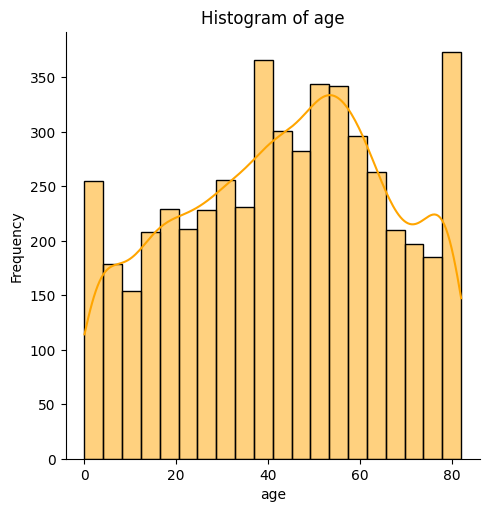

<Figure size 800x600 with 0 Axes>

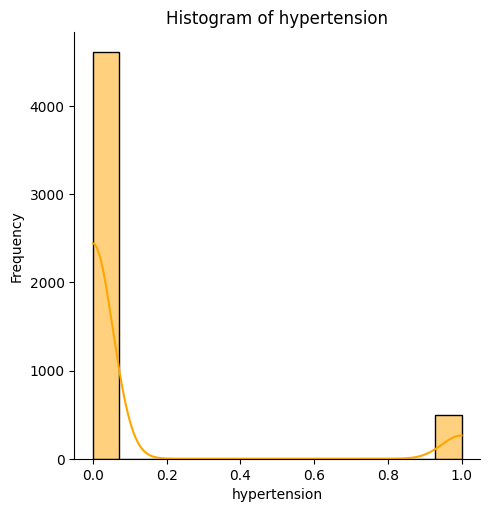

<Figure size 800x600 with 0 Axes>

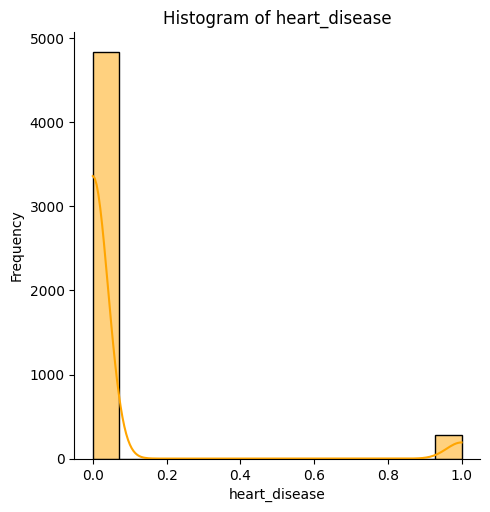

<Figure size 800x600 with 0 Axes>

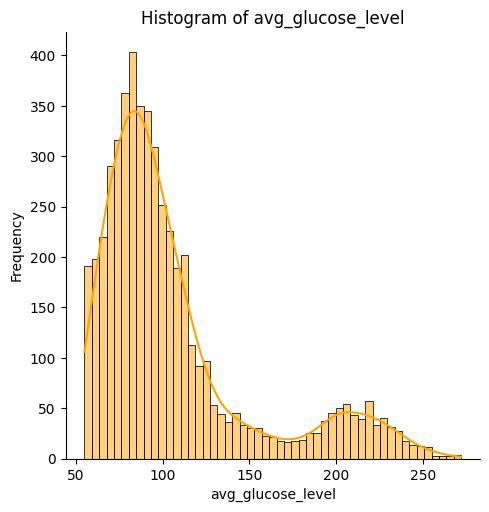

<Figure size 800x600 with 0 Axes>

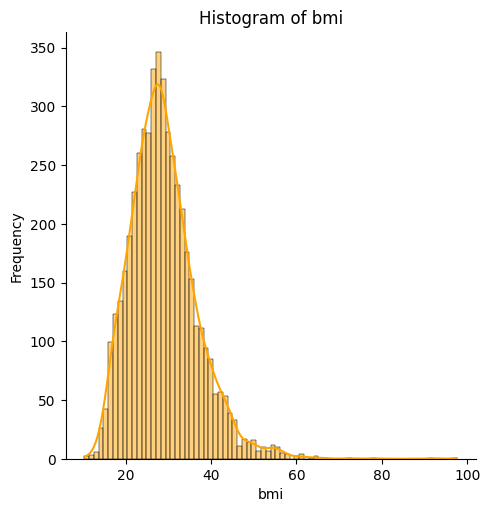

<Figure size 800x600 with 0 Axes>

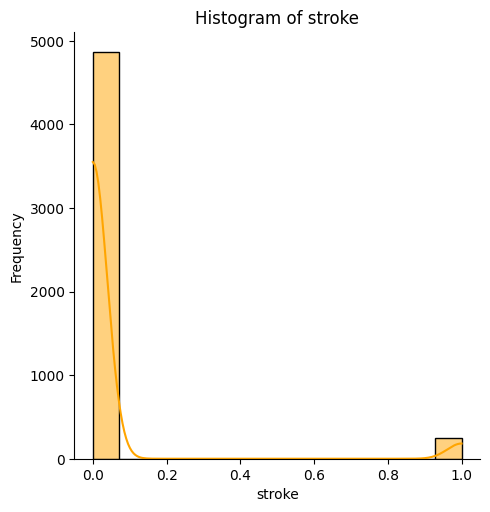

In [17]:
numeric_cols = df.select_dtypes(include = ["float64" , "int64"]).columns

for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.displot(data = df[col], kde = True , color = "orange")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {col}")
    plt.show()
    

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

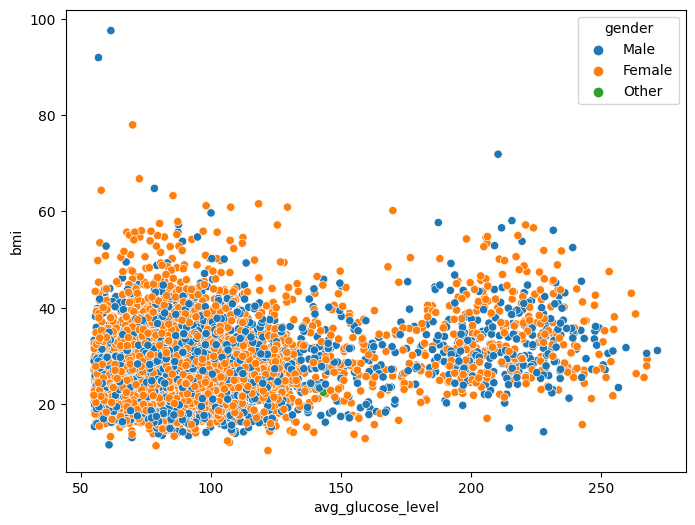

In [18]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df , x = "avg_glucose_level" , y = "bmi" , hue = "gender")

<Axes: xlabel='avg_glucose_level', ylabel='bmi'>

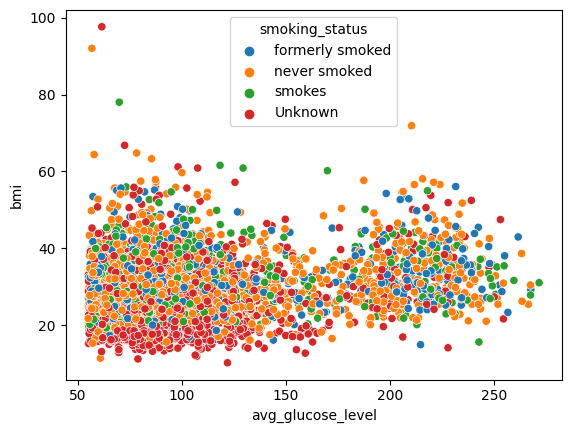

In [19]:
sns.scatterplot(data = df , x = "avg_glucose_level" , y = "bmi" , hue = "smoking_status")

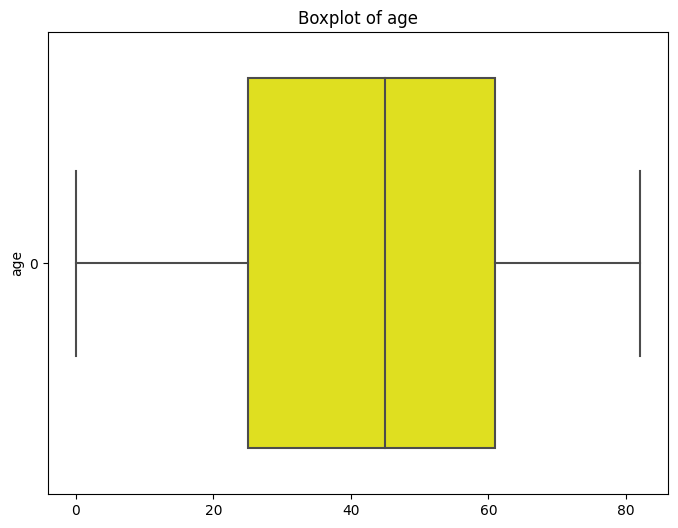

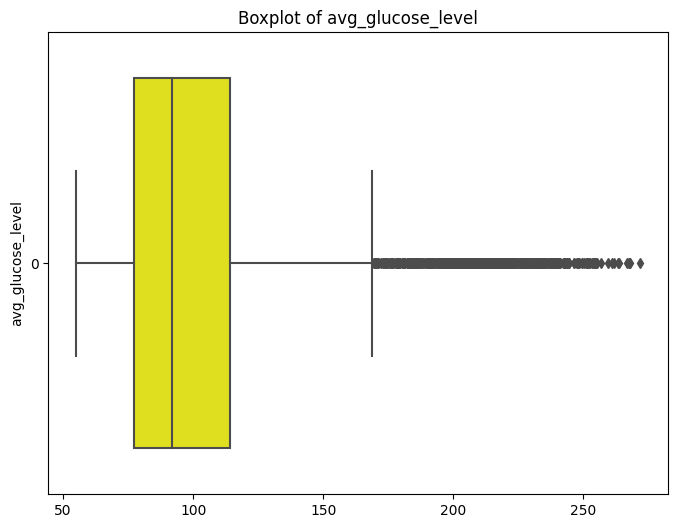

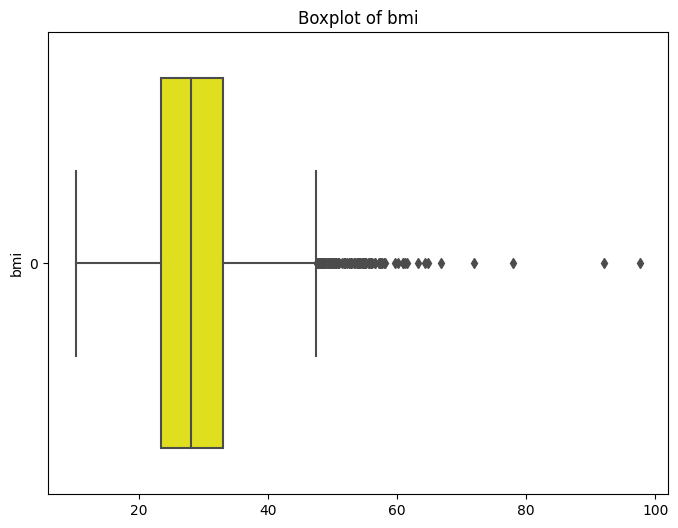

In [20]:
numeric_cols = df.select_dtypes(include = ["float"]).columns

for col in numeric_cols :
    plt.figure(figsize=(8,6))
    sns.boxplot(data = df[col] , orient = "h" , color = "yellow")
    plt.ylabel(col)
    plt.title(f"Boxplot of {col}")
    plt.show()

### Correlation and Heatmap

In [21]:
veri = df.copy()
veri

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [22]:
selected_cols = veri[["gender" , "ever_married" , "work_type" , "residence_type" , "smoking_status"]]
selected_cols = pd.get_dummies(selected_cols , drop_first = True)
selected_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   gender_Male                     5110 non-null   bool 
 1   gender_Other                    5110 non-null   bool 
 2   ever_married_Yes                5110 non-null   bool 
 3   work_type_Never_worked          5110 non-null   bool 
 4   work_type_Private               5110 non-null   bool 
 5   work_type_Self-employed         5110 non-null   bool 
 6   work_type_children              5110 non-null   bool 
 7   residence_type_Urban            5110 non-null   bool 
 8   smoking_status_formerly smoked  5110 non-null   bool 
 9   smoking_status_never smoked     5110 non-null   bool 
 10  smoking_status_smokes           5110 non-null   bool 
dtypes: bool(11)
memory usage: 55.0 KB


In [23]:
veri = df.drop(columns = ["gender" ,"ever_married" , "work_type" , "residence_type" , "smoking_status"])
veri = pd.concat ([selected_cols,veri] , axis = 1)
veri.reset_index(drop=True, inplace=True)
veri

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,True,False,True,False,True,False,False,True,True,False,False,9046,67.0,0,1,228.69,36.6,1
1,False,False,True,False,False,True,False,False,False,True,False,51676,61.0,0,0,202.21,NaN,1
2,True,False,True,False,True,False,False,False,False,True,False,31112,80.0,0,1,105.92,32.5,1
3,False,False,True,False,True,False,False,True,False,False,True,60182,49.0,0,0,171.23,34.4,1
4,False,False,True,False,False,True,False,False,False,True,False,1665,79.0,1,0,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,True,False,True,False,False,True,False,True,False,18234,80.0,1,0,83.75,NaN,0
5106,False,False,True,False,False,True,False,True,False,True,False,44873,81.0,0,0,125.20,40.0,0
5107,False,False,True,False,False,True,False,False,False,True,False,19723,35.0,0,0,82.99,30.6,0
5108,True,False,True,False,True,False,False,False,True,False,False,37544,51.0,0,0,166.29,25.6,0


In [24]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender_Male                     5110 non-null   bool   
 1   gender_Other                    5110 non-null   bool   
 2   ever_married_Yes                5110 non-null   bool   
 3   work_type_Never_worked          5110 non-null   bool   
 4   work_type_Private               5110 non-null   bool   
 5   work_type_Self-employed         5110 non-null   bool   
 6   work_type_children              5110 non-null   bool   
 7   residence_type_Urban            5110 non-null   bool   
 8   smoking_status_formerly smoked  5110 non-null   bool   
 9   smoking_status_never smoked     5110 non-null   bool   
 10  smoking_status_smokes           5110 non-null   bool   
 11  id                              5110 non-null   int64  
 12  age                             51

In [25]:
veri["bmi"] = veri["bmi"].fillna(veri["bmi"].median())

In [26]:
correlation = veri.corr()
correlation

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender_Male,1.000000,-0.011757,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477,0.001776,-0.027623,0.021275,0.085717,0.054580,-0.026310,0.009117
gender_Other,-0.011757,1.000000,-0.019327,-0.000920,0.012092,-0.006112,-0.005514,-0.014217,0.030568,-0.010728,-0.005978,0.012984,-0.010659,-0.004597,-0.003343,0.011489,-0.011743,-0.003166
ever_married_Yes,-0.029936,-0.019327,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226,0.013690,0.679125,0.164243,0.114644,0.155068,0.334911,0.108340
work_type_Never_worked,0.011496,-0.000920,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099,0.005459,-0.078653,-0.021608,-0.015712,-0.014675,-0.028327,-0.014882
work_type_Private,-0.032639,0.012092,0.153830,-0.076081,1.000000,-0.505475,-0.455992,-0.018173,0.025526,0.104860,0.100025,0.023698,0.116534,-0.005413,0.000027,0.016588,0.203886,0.011888
work_type_Self-employed,-0.025971,-0.006112,0.192716,-0.028728,-0.505475,1.000000,-0.172180,0.010594,0.093260,0.030668,-0.003626,-0.019956,0.327989,0.115442,0.086760,0.062694,0.070160,0.062168
work_type_children,0.089283,-0.005514,-0.544441,-0.025915,-0.455992,-0.172180,1.000000,-0.002309,-0.160668,-0.238041,-0.165234,-0.013939,-0.634215,-0.129506,-0.091634,-0.102250,-0.442102,-0.083869
residence_type_Urban,-0.005937,-0.014217,0.006261,0.022859,-0.018173,0.010594,-0.002309,1.000000,0.007654,-0.024466,0.027266,-0.001403,0.014180,-0.007913,0.003092,-0.004946,-0.000277,0.015458
smoking_status_formerly smoked,0.042738,0.030568,0.171256,-0.030095,0.025526,0.093260,-0.160668,0.007654,1.000000,-0.350934,-0.195571,0.007812,0.236897,0.058853,0.066804,0.068111,0.103533,0.064556
smoking_status_never smoked,-0.098813,-0.010728,0.102845,0.036238,0.104860,0.030668,-0.238041,-0.024466,-0.350934,1.000000,-0.327653,0.011426,0.119307,0.065063,-0.021856,0.023885,0.107636,-0.004129


<Axes: >

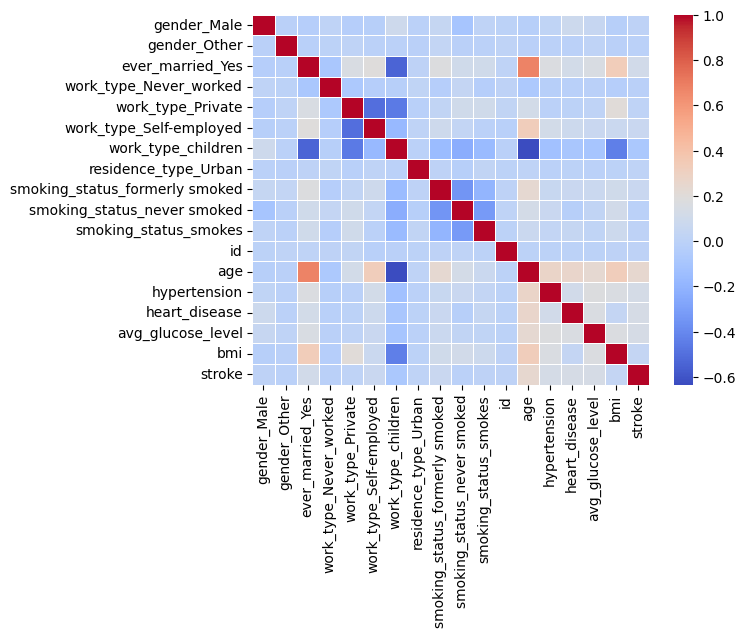

In [27]:
sns.heatmap(correlation , cmap="coolwarm" , fmt = ".2f" , linewidths = 0.5)

### Feature selection - Modelling - Accuracy

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [29]:
X = veri.drop(["stroke"] , axis=1)
y = veri["stroke"]

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
dt_model = DecisionTreeClassifier(max_depth = 3 , random_state = 42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [33]:
y_pred = dt_model.predict(X_test)

In [34]:
accuracy = accuracy_score(y_pred,y_test)
print(f"Accuracy score : {accuracy}")

Accuracy score : 0.9393346379647749
